In [4]:
%%html
<!-- 에디터 폰트를 조정합니다. -->
<style type='text/css'>
.CodeMirror{
    font-size: 14px;
    font-family: D2Coding;
</style>
 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/D2Coding-Ver1.3.2-20180524.ttf").get_name()
rc('font', family=font_name)

pandas에 대한 간략한 소개입니다. 더 자세한 예제들은 <a href="https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook">cookbook</a>에서 볼 수 있습니다.
일반적으로 다음과 같이 가져옵니다 :

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 객체 생성

참조 : <a href="https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro">데이터 구조 소개</a><br>
pandas를 이해하기 위해선, 기본적으로 <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series">Series</a>와 DataFrame이라는 두 가지 자료구조에 익숙해질 필요가 있습니다. <br>Series객체는 파이썬의 사전형과 비슷하지만 약간 다릅니다. 정수형 인덱스가 자동으로 붙습니다. list를 전달해서 Series를 만듭니다 :

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime을 인덱스로 갖는 <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame">DataFrame</a>을 numpy array를 전달하여 생성해보기 :

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.056598,0.976321,-0.938536,1.521994
2013-01-02,1.801178,-0.286565,1.033142,-0.440465
2013-01-03,-0.578730,0.776866,1.891444,0.834353
2013-01-04,-0.226171,0.410922,0.469082,1.746701
2013-01-05,-3.041259,-0.665605,1.311177,-0.978491
2013-01-06,-0.077595,-0.883355,0.240565,-0.392999


series-like 객체들을 dict형으로 전달하여 DataFrame을 생성합니다 :

In [5]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


<a href="https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes">dtype</a> 확인 :

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 데이터 보기
참조 : <a href="https://pandas.pydata.org/pandas-docs/stable/basics.html#basics">기본 사항 섹션</a>
프레임의 위쪽 및 아래쪽 행들을 봅니다 :

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.056598,0.976321,-0.938536,1.521994
2013-01-02,1.801178,-0.286565,1.033142,-0.440465
2013-01-03,-0.578730,0.776866,1.891444,0.834353
2013-01-04,-0.226171,0.410922,0.469082,1.746701
2013-01-05,-3.041259,-0.665605,1.311177,-0.978491


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.226171,0.410922,0.469082,1.746701
2013-01-05,-3.041259,-0.665605,1.311177,-0.978491
2013-01-06,-0.077595,-0.883355,0.240565,-0.392999


인덱스, 열 및 기본 numpy 데이터 표시 :

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 0.05659765,  0.97632067, -0.9385356 ,  1.52199372],
       [ 1.80117799, -0.28656457,  1.03314191, -0.44046498],
       [-0.57872993,  0.77686619,  1.8914439 ,  0.8343529 ],
       [-0.22617125,  0.41092186,  0.46908232,  1.74670134],
       [-3.0412589 , -0.66560471,  1.31117667, -0.97849069],
       [-0.07759519, -0.8833549 ,  0.24056479, -0.39299911]])

describe 메소드는 데이터의 통계 요약을 보여줍니다 :

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.344330,0.054764,0.667812,0.381849
std,1.560604,0.776280,0.984586,1.139704
min,-3.041259,-0.883355,-0.938536,-0.978491
25%,-0.490590,-0.570845,0.297694,-0.428599
50%,-0.151883,0.062179,0.751112,0.220677
75%,0.023049,0.685380,1.241668,1.350084
max,1.801178,0.976321,1.891444,1.746701


전치 데이터 :

In [13]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.056598,1.801178,-0.578730,-0.226171,-3.041259,-0.077595
B,0.976321,-0.286565,0.776866,0.410922,-0.665605,-0.883355
C,-0.938536,1.033142,1.891444,0.469082,1.311177,0.240565
D,1.521994,-0.440465,0.834353,1.746701,-0.978491,-0.392999


축 별 정렬

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.521994,-0.938536,0.976321,0.056598
2013-01-02,-0.440465,1.033142,-0.286565,1.801178
2013-01-03,0.834353,1.891444,0.776866,-0.578730
2013-01-04,1.746701,0.469082,0.410922,-0.226171
2013-01-05,-0.978491,1.311177,-0.665605,-3.041259
2013-01-06,-0.392999,0.240565,-0.883355,-0.077595


값으로 정렬

In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-0.077595,-0.883355,0.240565,-0.392999
2013-01-05,-3.041259,-0.665605,1.311177,-0.978491
2013-01-02,1.801178,-0.286565,1.033142,-0.440465
2013-01-04,-0.226171,0.410922,0.469082,1.746701
2013-01-03,-0.578730,0.776866,1.891444,0.834353
2013-01-01,0.056598,0.976321,-0.938536,1.521994


## 선택
__주의__: 선택 및 설정에는 표준 파이썬/NumPy가 표현이 직관적이고 코드 작성, 대화형 작업에 편리하지만, 우리는 최적화된 pandas 데이터 접근 방법을 더 권장합니다. (.at, .iat, .loc, .iloc, .ix) <br>
참조 : <a href="https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing">인덱싱 및 데이터 선택</a>
및 <a href="https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced">다중 인덱스/고급인덱스</a>

### 얻기
한 열을 선택하면 Series가 생성됩니다. df.A와 효과는 같습니다 :

In [16]:
df['A']

2013-01-01    0.056598
2013-01-02    1.801178
2013-01-03   -0.578730
2013-01-04   -0.226171
2013-01-05   -3.041259
2013-01-06   -0.077595
Freq: D, Name: A, dtype: float64

[]를 이용하면, 행들을 슬라이싱할 수 있습니다 :

In [17]:
df[0:3]

,A,B,C,D
2013-01-01,0.056598,0.976321,-0.938536,1.521994
2013-01-02,1.801178,-0.286565,1.033142,-0.440465
2013-01-03,-0.578730,0.776866,1.891444,0.834353


### 레이블 별 선택
참조 : <a href="https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label">레이블 별 선택</a><br>
레이블을 사용하여 행 선택 :

In [18]:
df.loc[dates[0]]

A    0.056598
B    0.976321
C   -0.938536
D    1.521994
Name: 2013-01-01 00:00:00, dtype: float64

레이블로 다중 선택 :

In [19]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.056598,0.976321
2013-01-02,1.801178,-0.286565
2013-01-03,-0.578730,0.776866
2013-01-04,-0.226171,0.410922
2013-01-05,-3.041259,-0.665605
2013-01-06,-0.077595,-0.883355


레이블 슬라이싱 ( __주의__ : 양쪽 끝점도 포함됨 ) :

In [20]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.801178,-0.286565
2013-01-03,-0.578730,0.776866
2013-01-04,-0.226171,0.410922


반환된 객체의 차원 축소

In [21]:
df.loc['20130102',['A','B']]

A    1.801178
B   -0.286565
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값 얻기

In [22]:
df.loc[dates[0],'A']

0.056597646265518345

스칼라에 빠르게 접근하기 위해서는 (이전 메소드와 동일)

In [23]:
df.at[dates[0],'A']

0.056597646265518345

### 위치 별 선택
참조 : <a href="https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer">위치 별 선택</a><br>
정수를 파라미터로 전달해 선택하기 :

In [24]:
df.iloc[3]

A   -0.226171
B    0.410922
C    0.469082
D    1.746701
Name: 2013-01-04 00:00:00, dtype: float64

정수형 슬라이스는 numpy / python과 유사하게 동작 :

In [25]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.226171,0.410922
2013-01-05,-3.041259,-0.665605


numpy / python 스타일과 비슷한 정수들의 위치 리스트로도 동작 :

In [26]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.801178,1.033142
2013-01-03,-0.578730,1.891444
2013-01-05,-3.041259,1.311177


명시적으로 행을 분할하고 싶은 경우

In [27]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.801178,-0.286565,1.033142,-0.440465
2013-01-03,-0.578730,0.776866,1.891444,0.834353


명시적으로 열을 분할하고 싶은 경우

In [28]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.976321,-0.938536
2013-01-02,-0.286565,1.033142
2013-01-03,0.776866,1.891444
2013-01-04,0.410922,0.469082
2013-01-05,-0.665605,1.311177
2013-01-06,-0.883355,0.240565


명시적으로 값을 가져오고 싶은 경우

In [29]:
df.iloc[1,1]

-0.28656456649852452

스칼라에 더 빠르게 접근하는 메서드는 iat (효과는 이전 메서드와 동일)

In [30]:
df.iat[1,1]

-0.28656456649852452

### 부울 색인 생성

단일 열의 값을 사용하여 데이터를 선택합니다.

In [31]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.056598,0.976321,-0.938536,1.521994
2013-01-02,1.801178,-0.286565,1.033142,-0.440465


부울 조건이 충족되는 DataFrame에서 값을 선택합니다.

In [32]:
df[df > 0]

,A,B,C,D
2013-01-01,0.056598,0.976321,NaN,1.521994
2013-01-02,1.801178,NaN,1.033142,NaN
2013-01-03,NaN,0.776866,1.891444,0.834353
2013-01-04,NaN,0.410922,0.469082,1.746701
2013-01-05,NaN,NaN,1.311177,NaN
2013-01-06,NaN,NaN,0.240565,NaN


isin()필터링 방법 사용 :

In [33]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.056598,0.976321,-0.938536,1.521994,one
2013-01-02,1.801178,-0.286565,1.033142,-0.440465,one
2013-01-03,-0.578730,0.776866,1.891444,0.834353,two
2013-01-04,-0.226171,0.410922,0.469082,1.746701,three
2013-01-05,-3.041259,-0.665605,1.311177,-0.978491,four
2013-01-06,-0.077595,-0.883355,0.240565,-0.392999,three


In [34]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.578730,0.776866,1.891444,0.834353,two
2013-01-05,-3.041259,-0.665605,1.311177,-0.978491,four


### 설정
새 열을 설정하면 데이터를 인덱스별로 자동 정렬합니다.

In [35]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [36]:
df['F'] = s1

라벨별로 값 설정하기

In [37]:
df.at[dates[0],'A'] = 0

위치 별 값 설정

In [38]:
df.iat[0,1] = 0

numpy array로 지정하여 설정하기

In [39]:
df.loc[:,'D'] = np.array([5] * len(df))

In [40]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.938536,5,NaN
2013-01-02,1.801178,-0.286565,1.033142,5,1.0
2013-01-03,-0.578730,0.776866,1.891444,5,2.0
2013-01-04,-0.226171,0.410922,0.469082,5,3.0
2013-01-05,-3.041259,-0.665605,1.311177,5,4.0
2013-01-06,-0.077595,-0.883355,0.240565,5,5.0


where 연산 이용

In [41]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.938536,-5,NaN
2013-01-02,-1.801178,-0.286565,-1.033142,-5,-1.0
2013-01-03,-0.578730,-0.776866,-1.891444,-5,-2.0
2013-01-04,-0.226171,-0.410922,-0.469082,-5,-3.0
2013-01-05,-3.041259,-0.665605,-1.311177,-5,-4.0
2013-01-06,-0.077595,-0.883355,-0.240565,-5,-5.0


### 결측치 처리
pandas는 결측값을 나타내기 위해 np.nan값을 사용합니다. 기본적으로 계산에 포함되지 않습니다. <a href="https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data">결측치 섹션</a>을 참조하세요. 색인 재생성을 사용하여 특정한 축의 색인을 변경 / 추가 / 삭제할 수 있습니다. 그러면 데이터의 사본이 반환됩니다.

In [42]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.938536,5,NaN,1.0
2013-01-02,1.801178,-0.286565,1.033142,5,1.0,1.0
2013-01-03,-0.578730,0.776866,1.891444,5,2.0,NaN
2013-01-04,-0.226171,0.410922,0.469082,5,3.0,NaN


결측치가 포함된 모든 행을 삭제합니다.

In [43]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.801178,-0.286565,1.033142,5,1.0,1.0


결측치를 특정 값으로 채웁니다 :

In [44]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.938536,5,5.0,1.0
2013-01-02,1.801178,-0.286565,1.033142,5,1.0,1.0
2013-01-03,-0.578730,0.776866,1.891444,5,2.0,5.0
2013-01-04,-0.226171,0.410922,0.469082,5,3.0,5.0


nan 값이 있는 위치들에 대한 boolean 마스크를 얻으려면

In [45]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 조작

참조 : <a href="https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop">기본 이진 연산 섹션</a>

### 통계
일반적으로 조작은 누락된 데이터를 제외합니다. 
<br>기술 통계 예시

In [46]:
df.mean()

A   -0.353763
B   -0.107956
C    0.667812
D    5.000000
F    3.000000
dtype: float64

동일한 작업을 다른 축에서 하고 싶다면

In [47]:
df.mean(1)

2013-01-01    1.015366
2013-01-02    1.709551
2013-01-03    1.817916
2013-01-04    1.730767
2013-01-05    1.320863
2013-01-06    1.855923
Freq: D, dtype: float64

차원이 다르고, 값이 비어있는 객체로도 연산은 됩니다. pandas가 지정된 차원을 따라 자동으로 브로드캐스트합니다.

In [48]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [49]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.578730,-0.223134,0.891444,4.0,1.0
2013-01-04,-3.226171,-2.589078,-2.530918,2.0,0.0
2013-01-05,-8.041259,-5.665605,-3.688823,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### 적용 
데이터에 함수 적용

In [50]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.938536,5,NaN
2013-01-02,1.801178,-0.286565,0.094606,10,1.0
2013-01-03,1.222448,0.490302,1.986050,15,3.0
2013-01-04,0.996277,0.901223,2.455133,20,6.0
2013-01-05,-2.044982,0.235619,3.766309,25,10.0
2013-01-06,-2.122577,-0.647736,4.006874,30,15.0


In [51]:
df.apply(lambda x: x.max() - x.min())

A    4.842437
B    1.660221
C    2.829980
D    0.000000
F    4.000000
dtype: float64

### 히스토그램 작성
참조 : <a href="https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization">히스토그램 및 이산형</a>

In [52]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    5
2    3
3    0
4    3
5    4
6    6
7    1
8    4
9    2
dtype: int32

In [53]:
s.value_counts()

3    3
4    2
6    1
5    1
2    1
1    1
0    1
dtype: int64

### 문자열 메소드
Series에는 str 속성에 문자열 처리 메서드 세트가 있으므로 아래 코드와 같이 배열의 각 요소를 쉽게 조작 할 수 있습니다. str의 패턴 일치는 일반적으로 정규 표현식 사용이 (특정 상황에 항상 정규 표현식을 사용함) default임에 유의하십시오. <a href="https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods">벡터화 된 문자열 메서드</a>

## 병합
### concat
pandas는 Series, DataFrame 및 Panel 객체를 조인 / 병합 유형의 작업을 인덱스 및 관계 대수 기능에 대한 다양한 유형의 논리로 쉽게 결합할 수있는 다양한 기능을 제공합니다.

참고 : <a href="https://pandas.pydata.org/pandas-docs/stable/merging.html#merging">병합 섹션</a>

pandas 개체 연결하기 concat():

In [54]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.528354,-0.616663,-0.818853,0.207895
1,1.023473,0.522106,0.078838,-2.477596
2,-1.093808,0.681575,1.202144,1.209273
3,-1.943187,1.286858,-0.348863,0.079987
4,-0.059212,0.971815,0.698781,-0.630203
5,1.227435,-1.264738,0.132140,-0.857370
6,-3.660019,0.889377,-0.274803,-0.598144
7,-0.376568,1.851074,1.540870,-0.627943
8,-0.034467,-0.774737,-0.006356,-2.087316
9,-0.566514,1.561123,0.364504,0.364058


### JOIN
SQL 스타일의 병합. <a href="https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join">데이터베이스 스타일 조인</a>을 참조하십시오.

In [55]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


주어진 또 다른 예는 다음과 같습니다.

In [56]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### 추가
데이터 프레임에 행을 추가합니다. <a href="https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation">추가 정보</a> 보기

In [57]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.079914,-0.056717,-0.592348,0.262288
1,-1.524373,0.789250,-0.923290,0.029465
2,-0.604292,-1.507223,0.469169,0.222058
3,0.154394,-0.115023,1.316916,1.214306
4,1.312484,-0.384297,-0.313137,1.071374
5,0.377266,1.527992,-0.911776,0.341640
6,-1.683758,-0.129341,0.382703,0.187963
7,-1.016155,0.473621,0.290939,-0.607421


In [58]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.079914,-0.056717,-0.592348,0.262288
1,-1.524373,0.789250,-0.923290,0.029465
2,-0.604292,-1.507223,0.469169,0.222058
3,0.154394,-0.115023,1.316916,1.214306
4,1.312484,-0.384297,-0.313137,1.071374
5,0.377266,1.527992,-0.911776,0.341640
6,-1.683758,-0.129341,0.382703,0.187963
7,-1.016155,0.473621,0.290939,-0.607421
8,0.154394,-0.115023,1.316916,1.214306


### 그룹핑
"그룹화"는 다음 단계 중 하나 이상을 포함하는 프로세스를 나타냅니다.

* 몇 가지 기준에 따라 그룹으로 데이터 __분할__
* 독립적으로 각 그룹에 기능 __적용__
* 결과를 데이터 구조로 __결합__

참고: <a href="https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby">그룹화 섹션</a>

In [59]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.311794,-1.964857
1,bar,one,1.576009,-0.516516
2,foo,two,-0.961060,0.678606
3,bar,three,0.278701,-0.217170
4,foo,two,1.133641,-0.528734
5,bar,two,0.233522,-1.459642
6,foo,one,1.619282,0.931328
7,foo,three,-2.427456,-0.915608


그룹화 한 다음 sum결과 그룹에 기능을 적용합니다.

In [60]:
df.groupby('A').sum()

,C,D
A,,
bar,2.088231,-2.193328
foo,-0.947386,-1.799264


여러 열을 기준으로 그룹화하면 계층적 색인이 만들어지며 이 색인을 사용하여 함수를 적용합니다.

In [61]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.576009 -0.516516
    three  0.278701 -0.217170
    two    0.233522 -1.459642
foo one    1.307488 -1.033529
    three -2.427456 -0.915608
    two    0.172581  0.149873

## 재구성하기
<a href="https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical">계층적 인덱싱</a> 및 <a href="https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking">Reshaping</a>에 대한 섹션을 참조하십시오 .
### 스택

In [62]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.994272  0.057130
      two     0.115542 -0.076363
baz   one    -1.273527  0.031276
      two    -0.639882  0.644748

stack() 메소드는 DataFrame 컬럼의 레벨을 "압축"합니다.

In [63]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.994272
               B    0.057130
       two     A    0.115542
               B   -0.076363
baz    one     A   -1.273527
               B    0.031276
       two     A   -0.639882
               B    0.644748
dtype: float64

(MultiIndex를 인덱스로 갖는) "스택된" DataFrame 또는 Series에서, stack()의 역동작은 unstack() 입니다. 이는 기본으로 마지막 레벨을 unstack 합니다.:

In [64]:
stacked.unstack()

A         B
first second                    
bar   one    -0.994272  0.057130
      two     0.115542 -0.076363
baz   one    -1.273527  0.031276
      two    -0.639882  0.644748

In [65]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.994272  0.115542
      B  0.057130 -0.076363
baz   A -1.273527 -0.639882
      B  0.031276  0.644748

In [66]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.994272 -1.273527
       B  0.057130  0.031276
two    A  0.115542 -0.639882
       B -0.076363  0.644748

### 피벗 테이블
<a href="https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot">피벗 테이블 섹션</a>을 참조하십시오 .

In [67]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.162223,-0.652810
1,one,B,foo,0.319547,0.042601
2,two,C,foo,-0.075388,-0.651058
3,three,A,bar,0.919022,-1.498175
4,one,B,bar,-0.672710,1.392304
5,one,C,bar,1.316809,0.264672
6,two,A,foo,0.052272,0.670914
7,three,B,foo,0.147484,0.481988
8,one,C,foo,0.667290,1.473794
9,one,A,bar,0.651496,-0.201024


이 데이터에서 피벗 테이블을 매우 쉽게 생성 할 수 있습니다.

In [68]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.651496 -0.162223
      B -0.672710  0.319547
      C  1.316809  0.667290
three A  0.919022       NaN
      B       NaN  0.147484
      C -1.487673       NaN
two   A       NaN  0.052272
      B -0.027220       NaN
      C       NaN -0.075388

### 시계열 
pandas는 주파수 변환 중에 재샘플링 작업을 수행하기 위한 간단하고 강력하며 효율적인 기능을 제공합니다. (예 : 두번째 데이터를 5분단위 데이터로 변환). 이는 재무 애플리케이션에서 매우 일반적이지만 이에 국한되지 않습니다. <a href="https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries">시계열 섹션</a>을 참조하십시오.

In [69]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    25593
Freq: 5T, dtype: int32

시간대 표현

In [70]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.000049
2012-03-07    0.275221
2012-03-08   -1.899297
2012-03-09   -0.175004
2012-03-10   -0.856603
Freq: D, dtype: float64

In [71]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.000049
2012-03-07 00:00:00+00:00    0.275221
2012-03-08 00:00:00+00:00   -1.899297
2012-03-09 00:00:00+00:00   -0.175004
2012-03-10 00:00:00+00:00   -0.856603
Freq: D, dtype: float64

다른 시간대로 변환

In [72]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.000049
2012-03-06 19:00:00-05:00    0.275221
2012-03-07 19:00:00-05:00   -1.899297
2012-03-08 19:00:00-05:00   -0.175004
2012-03-09 19:00:00-05:00   -0.856603
Freq: D, dtype: float64

시간 범위 표현 간의 변환

In [73]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.453041
2012-02-29    0.050834
2012-03-31    0.067855
2012-04-30   -1.751273
2012-05-31    0.339205
Freq: M, dtype: float64

In [74]:
ps = ts.to_period()
ps

2012-01    0.453041
2012-02    0.050834
2012-03    0.067855
2012-04   -1.751273
2012-05    0.339205
Freq: M, dtype: float64

In [75]:
ps.to_timestamp()

2012-01-01    0.453041
2012-02-01    0.050834
2012-03-01    0.067855
2012-04-01   -1.751273
2012-05-01    0.339205
Freq: MS, dtype: float64

기간과 타임 스탬프를 변환하면 편리한 산술 기능을 사용할 수 있습니다. 다음 예제에서는 11 월에 끝나는 연도의 분기 별 빈도를 분기말 다음 달의 9am로 변환합니다.

In [76]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.351051
1990-06-01 09:00    1.293514
1990-09-01 09:00    0.218533
1990-12-01 09:00    0.413038
1991-03-01 09:00    0.487338
Freq: H, dtype: float64

### 카테고리

pandas는 DataFrame안에 범주형 데이터를 포함할 수 있습니다. 전체 문서는 <a href="https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical">범주형 소개</a> 및 <a href="https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical">API 설명서</a>를 참조하십시오.

In [77]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


raw grade를 범주형 데이터 유형으로 변환하십시오.

In [78]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

카테고리의 이름을 보다 의미있는 이름으로 변경하십시오 (Series.cat.categories에 할당하는 것은 inplace입니다!).

In [79]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

카테고리의 순서를 바꾸고 동시에 누락된 카테고리도 추가해 보세요. ( Series 밑에 .cat 메소드가 새로운 Sries를 기본으로 반환합니다.)

In [80]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

정렬은 어휘 순서가 아닌 범주 순서대로 수행됩니다.

In [81]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


범주형 열을 기준으로 그룹화하면 빈 범주도 표시됩니다.

In [82]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 플롯 
<a href="https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization">plotting</a> 문서

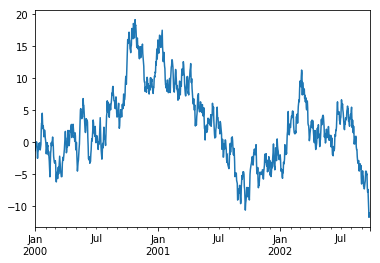

In [83]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

DataFrame에서는 plot()레이블이 있는 모든 열을 플롯할 때 편리합니다.

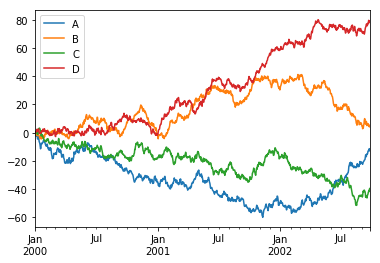

In [84]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## 데이터 입출력 얻기

### CSV 
<a href="https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv">csv 파일에 쓰기</a>

In [85]:
df.to_csv('foo.csv')

<a href="https://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table">csv 파일에서 읽기</a>

In [86]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.213072,-1.195637,-0.462508,-0.016682
1,2000-01-02,-0.603731,-1.309983,-0.896668,0.245021
2,2000-01-03,-2.466303,0.377860,0.269221,0.210649
3,2000-01-04,-2.347942,-0.265661,0.544816,0.860220
4,2000-01-05,-0.782951,0.229751,0.224038,0.998969
5,2000-01-06,-1.437936,0.560879,1.618223,2.307376
6,2000-01-07,-2.358557,-2.261325,-0.079693,1.578715
7,2000-01-08,-4.605497,-0.423754,-1.348300,0.839386
8,2000-01-09,-4.151217,-0.222247,-1.065410,1.610209
9,2000-01-10,-3.009593,0.048558,2.614495,1.814005


### Excel 

<a href="https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel">MS Excel</a> 읽기 및 쓰기

엑셀 파일에 쓰기

In [87]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

엑셀 파일에서 읽기

In [88]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-1.213072,-1.195637,-0.462508,-0.016682
2000-01-02,-0.603731,-1.309983,-0.896668,0.245021
2000-01-03,-2.466303,0.377860,0.269221,0.210649
2000-01-04,-2.347942,-0.265661,0.544816,0.860220
2000-01-05,-0.782951,0.229751,0.224038,0.998969
2000-01-06,-1.437936,0.560879,1.618223,2.307376
2000-01-07,-2.358557,-2.261325,-0.079693,1.578715
2000-01-08,-4.605497,-0.423754,-1.348300,0.839386
2000-01-09,-4.151217,-0.222247,-1.065410,1.610209
2000-01-10,-3.009593,0.048558,2.614495,1.814005


# Gotchas

작업을 시도 할 때 다음과 같은 예외가 표시됩니다.

In [89]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

도움이 필요하다면 <a href="https://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas">Comparisons</a> 및 <a href="https://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas">Gotchas</a>를 참고하세요.<br>